# Aim of the notebook
Main steps:
- Import the Libraies
- Retreive a list of target URLs from an XML file
- Browse the URLs and extract the metadate from each, store them in a Knowledge Graph, and store it in a ttl file
- Visualise to the classes and properties in these data

## 1. Import Libraries

In [1]:
import sys
parentdir = ".."
sys.path.insert(0, parentdir)

import requests
from os import path
from tqdm.notebook import tqdm
import pandas as pd
import time

from metrics.WebResource import WebResource
from rdflib import Graph
from xml.dom import minidom
from rdflib import ConjunctiveGraph, Namespace, URIRef
from rdflib.namespace import RDF, RDFS

import random
import matplotlib.pyplot as plt

/Users/frikha-s/opt/anaconda3/envs/fair-checker-env/lib/python3.8/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 100.0.4896
[WDM] - Get LATEST driver version for 100.0.4896
[WDM] - Driver [/Users/frikha-s/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache


## 2. Extract Metadata From URLs Samples

In [2]:
#Extract metadata from a single URL

g = Graph()
g.parse("http://www.w3.org/People/Berners-Lee/card")
g.serialize(destination="Berners_Lee.ttl")

print(len(g))

86


In [3]:
#Extract metadata from a list of URLs
schema = Namespace("http://schema.org/")

target_urls = ["http://bio.tools/bwa", "http://bio.tools/jaspar", "https://doi.pangaea.de/10.1594/PANGAEA.942997", "https://zenodo.org/record/6411574#.Ykw0bi8itqs"]

KG_List_Urls = ConjunctiveGraph()
for u in tqdm(target_urls):
    wr = WebResource(url=u)
    KG_List_Urls += wr.get_rdf()
    print(f"Loaded {len(KG_List_Urls)} triples")

print(f"KG_List_Urls containes {len(KG_List_Urls)} triples")


  0%|          | 0/4 [00:00<?, ?it/s]

Loaded 124 triples
Loaded 219 triples
http://schema.org/
Loaded 352 triples


https://schema.org/
Loaded 412 triples
KG_List_Urls containes 412 triples


## 3. Retrieve a List of Target URLs

In [4]:
# parse the xml file
mydoc = minidom.parse('URLs.xml')

urls = mydoc.getElementsByTagName('ExpertLink')
 
#We can't use lists to store URLs because the data rate exceeded
#list_urls=list()

#Display the first 10 URLs
i=0
for url in tqdm(urls):
    #list_urls+=url.firstChild.data
    print(url.firstChild.data)
    i+=1
    if i>10: break

  0%|          | 0/10619 [00:00<?, ?it/s]

http://bio.tools/bwa
http://www.w3.org/People/Berners-Lee/card
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=166032
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=61
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=166029
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=166038
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=93
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=166035
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=585
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=118
http://www.orpha.net/consor/cgi-bin/OC_Exp.php?lng=en&Expert=166068


## 4. Feed the RDF Graph

In [6]:
schema = Namespace("http://schema.org/")

In [ ]:
##Uncomment this if you want to scrapp all URLs

KG_Total = ConjunctiveGraph()

for u in tqdm(urls):
    wr = WebResource(url=u.firstChild.data)
    KG_Total += wr.get_rdf()

##Display the total triples contained in the graph, after scrapping all URLs in the XML file
print(f"Loaded {len(KG_Total)} triples")

  0%|          | 0/10619 [00:00<?, ?it/s]

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

In [ ]:
print(f"Loaded {len(KG_Total)} triples")

In [8]:
#If you don't want to wait for all URLs to be scrapped
#This code will choose a randdom sample, scrappe it and display results
#Purpose: Avoid crushing orphanet.org

KG = ConjunctiveGraph()

sample_urls=random.choices(urls, k=10)

for u in tqdm(sample_urls):
    wr = WebResource(url=u.firstChild.data)
    KG += wr.get_rdf()
    print(f"Loaded {len(KG)} triples")
    
print(f"The Graph containes {len(KG)} triples")

  0%|          | 0/10 [00:00<?, ?it/s]

http://schema.org/
Loaded 20 triples
http://schema.org/
Loaded 65 triples
http://schema.org/
Loaded 125 triples
http://schema.org/
Loaded 185 triples
http://schema.org/
Loaded 206 triples
http://schema.org/
Loaded 250 triples
http://schema.org/
Loaded 270 triples
http://schema.org/
Loaded 291 triples
http://schema.org/
Loaded 359 triples
http://schema.org/
Loaded 382 triples
The Graph containes 382 triples


In [9]:
#Save the KG in a turtle file
KG.serialize("scrapped_orphanet_bioschemas.ttl", format="turtle")

<Graph identifier=Nbee6a7d0d41d41aaaf10cb4523c702a5 (<class 'rdflib.graph.ConjunctiveGraph'>)>

In [55]:
#Display the file
#!cat scrapped_orphanet_bioschemas.ttl

## 5. Display Bioschemas Properties Counts

In [11]:
def get_dataframe_from_query_results(res):    
    return pd.DataFrame(res.bindings)

In [12]:
### display used properties
property_counts = """
SELECT ?p (count(?p) as ?count) WHERE {
    ?s ?p ?o .
} 
GROUP BY ?p
ORDER BY DESC(?count)
"""

res = KG.query(property_counts)
print()
print("********** Used properties **********")
df = get_dataframe_from_query_results(res)
df


********** Used properties **********


,count,p
0,94,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,64,http://schema.org/codingSystem
2,64,http://schema.org/code
3,64,http://schema.org/codeValue
4,20,http://schema.org/inLanguage
5,20,http://schema.org/name
6,20,http://schema.org/textValue
7,10,http://schema.org/description
8,10,http://schema.org/epidemiology
9,10,http://schema.org/identifier


## 6. Display Bioschemas Classes Counts

In [13]:
### display used classes
classes_counts = """
SELECT ?c (count(?c) as ?count) WHERE {
    ?s rdf:type ?c .
} 
GROUP BY ?c
ORDER BY DESC(?count)
"""

res = KG.query(classes_counts)
print()
print("********** Used classes **********")
df = get_dataframe_from_query_results(res)
df


********** Used classes **********


,c,count
0,http://schema.org/MedicalCode,64
1,http://schema.org/PronounceableText,20
2,http://schema.org/MedicalCondition,10


In [14]:
df = pd.DataFrame(res ,columns=['class','count'])

df["class"] = df["class"].astype("str")
df["count"] = df["count"].astype("int")
df.dtypes

class    object
count     int64
dtype: object

In [44]:
count_sum=94

def pourcentage(x):
          return x*100/count_sum
def get_suffix(x):
      return str(x).split(sep="/")[-1]

df2 = df.copy()    
df2["%"] = df2['count'].apply(pourcentage)
df2["label"] = df2['class'].apply(get_suffix) 
df2

,class,count,%,label
0,http://schema.org/MedicalCode,64,68.085106,MedicalCode
1,http://schema.org/PronounceableText,20,21.276596,PronounceableText
2,http://schema.org/MedicalCondition,10,10.638298,MedicalCondition


In [45]:
#Ordering for better visualisation
cols = df2.columns.tolist()
#cols = [cols[0], cols[3], cols[1], cols[2]]
cols = [cols[3], cols[1]]
df2 = df2[cols]
df2

,label,count
0,MedicalCode,64
1,PronounceableText,20
2,MedicalCondition,10


********** ********** Scatter Chart ********** **********


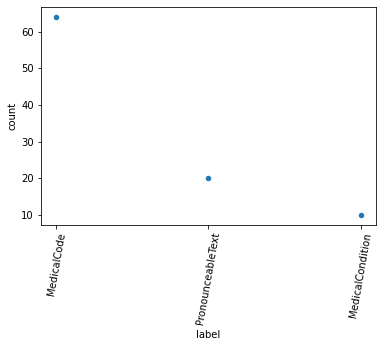

********** ********** Bar Chart ********** **********


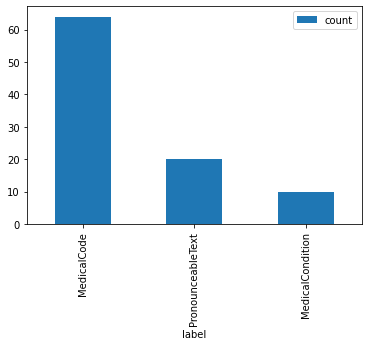

********** ********** Pie Chart ********** **********


<AxesSubplot:title={'center':'Pie Chart'}, ylabel='count'>

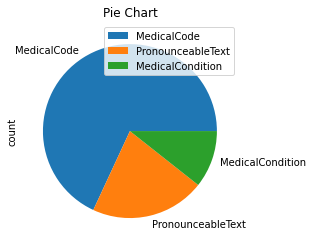

In [54]:
print("********** ********** Scatter Chart ********** **********")
df2.plot(x ='label', y='count', kind = 'scatter', rot=80)
plt.show()

print("********** ********** Bar Chart ********** **********")
df2.plot(x ='label', y='count', kind = 'bar')
plt.show()

print("********** ********** Pie Chart ********** **********")

my_labels=['MedicalCode','PronounceableText','MedicalCondition']
df2.plot.pie(title="Pie Chart",y='count',figsize=(4,4),labels=my_labels)


## For Further Visualizations
Have a look to Seaborn and Bokeh libraries
https://seaborn.pydata.org
https://bokeh.org